In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot  as  plt
import matplotlib.animation as animation
import math
import sys

%matplotlib inline

# Aufgabe 4: LR-Zerlegung

Ziel dieser Aufgabe ist die Implementierung der LR-Zerlegung für tridiagonale Matritzen. Diese wird im folgenden Testskript verwendet um ein Auto, das über eine Hängebrücke fährt, zu simulieren.

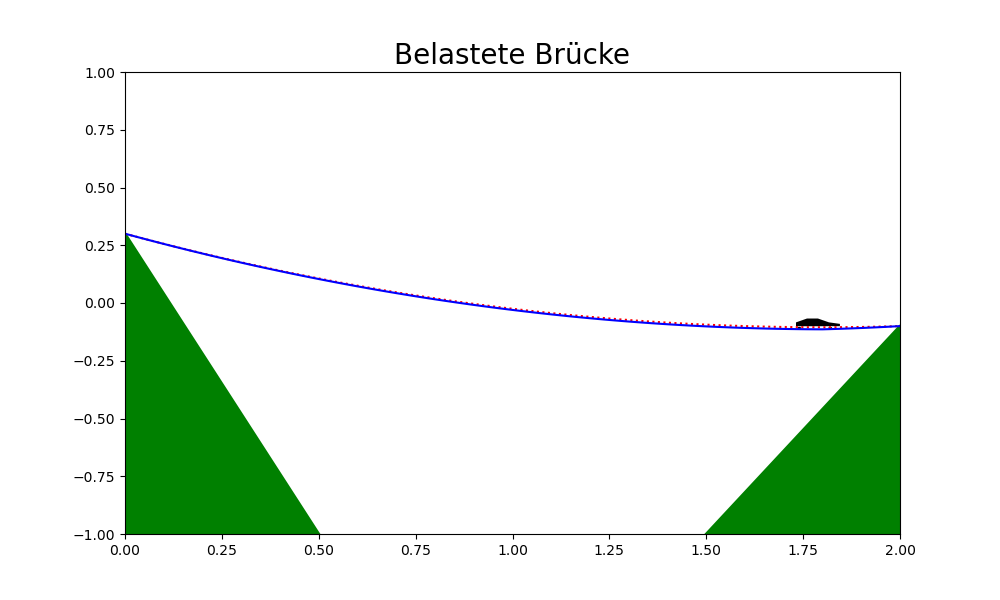

## Teil 1

Schreiben Sie in Python eine Routine `alpha, beta, gamma = lr(a,b,c)`, welche 
die LR-Zerlegung einer Tridiagonalmatrix
$$
A = \begin{bmatrix}
          a_1 & b_1 & & &  \\
          c_2 & a_2 & b_2 & & \\
           & \ddots & \ddots & \ddots & \\
           & & c_{n-1} & a_{n-1} & b_{n-1}\\
           & & & c_n & a_n
     \end{bmatrix}
$$
berechnet.

Dabei stehen die Vektoren `a,b,c` für die Diagonal- bzw. Nebendiagonaleinträge von $A$. 
Die Vektoren `alpha, beta, gamma` sind die Einträge in den Faktoren der LR-Zerlegung, nämlich
$$
L = \begin{bmatrix}
                          1 & & & \\
                          \gamma_2 & 1 & & \\
                           & \ddots & \ddots & \\
                           & & \gamma_n & 1 
                         \end{bmatrix}, \quad R = \begin{bmatrix}
                                              \alpha_1 & \beta_1 & & \\
                                              & \ddots &\ddots & \\
                                               & & \alpha_{n-1} & \beta_{n-1} \\
                                                & & & \alpha_n  
                                             \end{bmatrix}.
$$

> **Hinweis**: Für die Lösung dieser Aufgabe sollte keine $N \times N$-Matrix angelegt werden. Der Code kann damit auch so implementiert werden, dass er mit $N = 1\,000\,000$ arbeiten könnte.

In [ ]:
def lr(a, b, c) :
    """
    Faktorisiere die Tridiagonalmatrix A, gegeben durch die drei Bänder 
    a (Hauptdiagonale), b (obere Nebendiagonale) und c (untere Nebendiagonale)
    in die Bänder alpha, beta und gamma (analog zu a, b, c) der beiden 
    2-Band-Matrizen L (gamma und EINS) und R (alpha und beta).
    """
    n = a.size

    # ...
    
    return (alpha, beta, gamma)
    

## Teil 2

Des Weiteren soll eine Funktion `x = vorwaerts_rueckwaerts_substitution(alpha, beta, gamma, b)` geschrieben werden, 
welche die Lösung $x$
des Gleichungssystems $Ax = b$ bei gegebener LR-Faktorisierung von $A$ bestimmt.

In [ ]:
def vorwaerts_rueckwaerts_substitution(alpha, beta, gamma, b):
    '''
    Vorwärts-Rückwaerts-Substitution zur Loesung des bandweise faktorisiert
    vorliegenden Tridiagonalsystems A * x = b
    '''
    
    # ...
    
    return x

Scipy hat eine Lösung fuer Ihre Aufgabe, die Sie aber nur zum Vergleich mit Ihrer eigenen Funktion verwenden sollten.

In [ ]:
def lr2(A):
    LR, P = sp.linalg.lu_factor(A)
    return LR, P

def vorwaerts_rueckwaerts_substitution2(LR, p, b):
    x = sp.linalg.lu_solve((LR, p), b)
    return x


## Testskript

In [ ]:
N = 100  # Anzahl an Segmenten in der Brücke
h = 2.0 / N  # Länge der Segmente
gewicht = 0.25  # Gewicht des Autos
rb = np.array([0.3, -0.1])  # "Randbedingung"

a = np.full(N - 1, 2.0)
b = np.full(N - 2, -1.0)
c = np.full(N - 2, -1.0)

# LGS faktorisieren
# unbelastete Bruecke berechnen
alpha, beta, gamma = lr(a, b, c)
z = np.full(N - 1, -gewicht * h * h)
z[0] += rb[0]
z[-1] += rb[1]
x0 = np.hstack([rb[0], vorwaerts_rueckwaerts_substitution(alpha, beta, gamma, z), rb[1]])

# Test Ihrer Loesung:  Vergleich der unbelasteten Bruecke via np.linalg.solve
A = np.diag(a) + np.diag(b, k=1) + np.diag(c, k=-1)
LR, p = lr2(A)
x2 = vorwaerts_rueckwaerts_substitution2(LR, p, z)
error = np.linalg.norm(x0[1:-1] - x2, ord=np.inf)

print("Maximale Abweichung der Tridiagonal-Lösung vom Standard:")
print(error)

if error > 1e-10:
    raise ValueError("Beheben Sie erst Ihre Fehler, bevor die Animation berechnet wird.")

### Animations-Code

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Belastete Brücke", fontsize=20)
ax.set(xlim=(0.0, 2.0), ylim=(-1.0, 1.0))

# Hilfskoordinaten für Räder und Auto
t = np.linspace(0.0, 2 * math.pi, 11)
ct = 5.0 / 500 / 2.0 * np.cos(t)
st = 5.0 / 500 / 2.0 * (1.0 + np.sin(t))
carx = 5.0 * (3.4 * np.array([-1, 1, 1, 0.5, 0, -0.5, -1]) + 0.5)
cary = 5.0 * (4.0 * np.array([0.5, 0.5, 0.65, 0.75, 1, 1, 0.75]) - 1.2)

# Haenge
leftx = np.array([-0.1, 0.0, 0.5, -0.1])
lefty = np.array([rb[0], rb[0], -1.0, -1.0])
reitx = np.array([2.1, 2.0, 1.5, 2.1])
reity = np.array([rb[1], rb[1], -1.0, -1.0])
ax.fill(leftx, lefty, "green", linewidth=2, edgecolor="green")
ax.fill(reitx, reity, "green", linewidth=2, edgecolor="green")

b1 = None; b2 = None; r1 = None; r2 = None; car = None

def plofu(pcnt):
    global N, gewicht, rb, alpha, beta, gamma, x0, ct, st, carx, cary, r1, r2, b1, b2, car
    
    if pcnt % 10 == 0:
        print(f"Animation  wird generiert ({pcnt}/{N + N - 8})")
    
    if pcnt < N - 4:
        direction = 1
        i = pcnt + 2
    else:
        direction = 2
        i = N + N - 7 - pcnt

    if b1 != None:
        b1.remove(); b2.remove(); r1.remove(); r2.remove(); car.remove()
  
    # Bruecke unbelastet, belastet
    b1, = ax.plot(np.linspace(0.0, 2.0, N + 1), x0, "r:")
    h = 2.0 / N
    z = np.full(N - 1, -gewicht * h * h)
    z[0] += rb[0]
    z[i] -= 0.001
    z[-1] += rb[1]
    x = np.hstack([rb[0], vorwaerts_rueckwaerts_substitution(alpha, beta, gamma, z), rb[1]])
    b2, = ax.plot(np.linspace(0.0, 2.0, N + 1), x, "b-")
    
    # Raeder
    r1, = ax.fill(h * (i - 2) + ct, x[i - 2] + st, "black")
    r2, = ax.fill(h * (i + 2) + ct, x[i + 2] + st, "black")
    
    # Auto
    phi = math.atan2(x[i + 2] - x[i - 2], 4 * h)
    sphi = math.sin(phi)
    cphi = math.cos(phi)
    if direction == 1:
        car, = ax.fill(
            h * i + 1/300 * (carx * cphi - cary * sphi),
            x[i] + 1/300 * (cary * cphi + carx * sphi),
            "black",
        )
    else:
        car, = ax.fill(
            h * i - 1/300 * (carx * cphi + cary * sphi),
            x[i] + 1/300 * (cary * cphi - carx * sphi),
            "black",
        )

    return b1, b2, r1, r2, car

### Animation

In [ ]:
ani = animation.FuncAnimation(
    fig, plofu, N + N - 8, blit=True, interval=10000/N, repeat=False
)

from IPython.display import HTML
HTML(ani.to_jshtml())